# Hypothesis Testing

## Setup

In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

## Simulation Based Approach

- Example: Codeup starts producing a scratch off lottery ticket called "Golden Codys". The odds of winning a prize must be advertised to the state, and since we are manufacturing the tickets, we know exactly how many winners and losers there are.
- Theory: Our **population** is the 1000 tickets we have manufactured
- Implementation: Create a boolean pandas Series
    - we model win with true and lose with false
    - because of this, we can take the mean of a series to measure the
      likelihood of winning

The actual probability of winning is 0.25


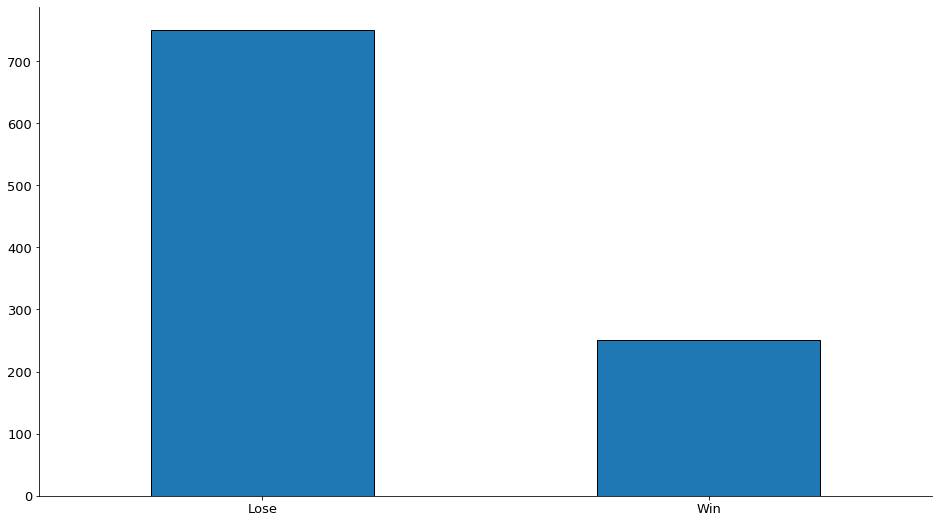

In [3]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation=0)
print('The actual probability of winning is %.2f' % tickets.mean())

- Scenario: Each student in a classroom is given a Golden Cody scratch off at random
- Theory

    We we take a random **sample** and calculate the win rate, we won't expect to see exactly 25% even though we know that is what the overall rate is.
    
    Examples of biased samples:
    
    - non-response: people that don't respond are a diff population
    - undercoverage: some groups aren't well represented
    - voluntary: people volunteer for surveys
    - leading questions
    - social desirability
    
- Implementation: Use the `.sample` method on our series to randomly choose 25 tickets, representing 25 students in a classroom. Use `.mean` to calculate what percentage of the values are `True`, or are winning tickets.

In [4]:
n = 25
tickets.sample(n).mean()

0.12

- Scenario: each student in 4 different cohorts is given a Golden Codys scratch off ticket, we want to calculate the win rate for each classroom.
- Theory: it is unlikely any classroom will have exactly a 25% winrate, instead we will see slightly different numbers for each classroom.
- Implementation: loop through a range of 5 to get a sample and calculate the winrate 5 times. Each of the 5 numbers produced represents the calculated winrate for one classroom of 25 students.

In [5]:
[tickets.sample(n).mean() for _ in range(5)]

[0.28, 0.28, 0.08, 0.24, 0.36]

- Theory

    The winrates we see aren't ever exactly 25%, but we would expect the rate to be closer to 25% than further away. That is, it is more likely that a classroom will come up with a win rate of 24% than a winrate of 10%.
    
    If we were to repeat this experiment a whole bunch of times, say 10,000, we would find that the calculated winrates are, in fact, normally distributed.
    
    That is, we would expect the calculated average winrate for a classroom to follow a normal distribution, *even though* the underlying random process is not based on a normal distribution

- Implementation: To visualize this, we'll create a series full of calculated winrates for 10,000 classrooms, each classroom made up of 25 students. That is, we will simulate 10,000 classrooms of 25 students getting Golden Codys and calculate the average winrate for each of the 10,000 classrooms.

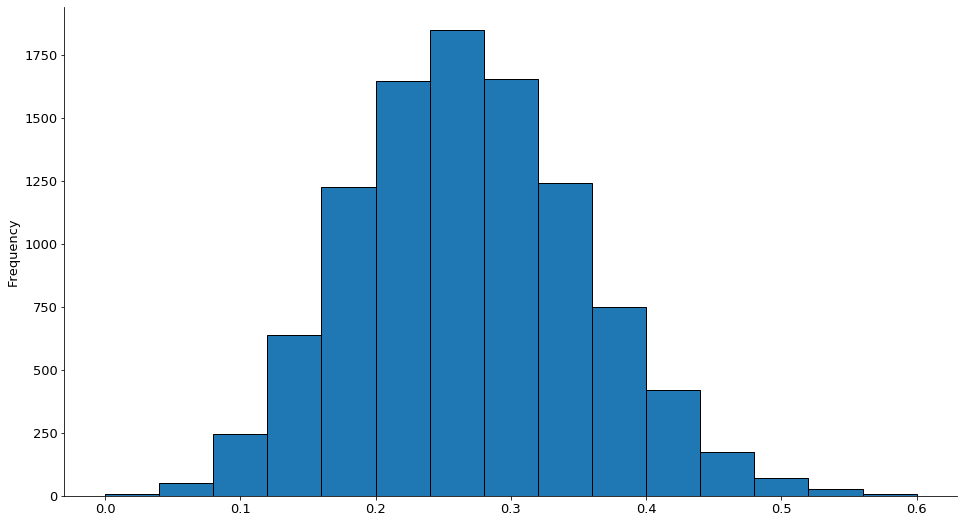

In [6]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins=15)

- Theory

    The above visual represents the **sampling distribution** for the winrate of Golden Codys, based on a class of 25.

    The **Central Limit Theorm** says that sampling distribution will be normally distributed even if the underlying random variable isn't.

<div style="background-color: rgba(0, 100, 200, .1); padding: 1em 3em; border-radius: 5px; border: 1px solid black">
    <div style="font-weight: bold; font-size: 1.2em; border-bottom: 1px dashed black; padding-bottom: .5em;">
        Mini Exercise -- CLT
    </div>
    <ol>
        <li>Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.</li>
        <li>Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.</li>
        <li>Plot the distribution of the calculated averages. What do you notice about the shape of the distribution of calculated averages? What kind of distribution is the underlying random variable (i.e. one dice roll?)</li>
    </ol>
</div>

- Theory: in practice, we won't have 10,000 samples to work with, but rather just 1. We can stil rely on the sampling distribution being normally distributed, and this has some intersting properties.

- the mean of the sampling distribution of the sample means will be the "true" mean
- the variance of the sampling distribution is the population variable divided by the sample size
- the standard deviation of the sampling distribution is $\sqrt{\frac{pq}{n}}$ (for our example), aka the
  **standard error**

In [7]:
se = math.sqrt((.25 * .75) / n)

Let's compare our calculated standard error (i.e. the standard deviation of the
sample means) to the experimental value:

In [8]:
print('SE:                 %.4f' % se)
print('sample_means.std(): %.4f' % calculated_winrates.std())

SE:                 0.0866
sample_means.std(): 0.0857


That the sampling distribution being normally distributed is very powerful and has important implications:

- confidence intervals for population parameter estimates (e.g. estimating the population mean)
    - as n goes up, interval becomes smaller
    - as certainty goes up, interval becomes larger
    - 99% of calculated CIs will contain the true mean (e.g. if we ran simulations and re-sampled, 99% of the simulations' calculated CIs would contain the true mean)
- hypothesis testing
    - One classroom calculates their winrate at 20% and claims the tickets were distributed unfairly. What is the likelihood we observe a 20% (or smaller) winrate just due to chance?

In [9]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

stats.norm(mean, sd).cdf(.2)

0.28283511827393837

The probability we've calculated is a **p-value**. The likelihood that we observe the data that we have if the null hypothesis is true.

## Null and Alternative Hypothesis

- $H_0$: status quo: no difference or no effect
- $H_a$: alternative: there is a difference or effect
- whether $H_a$ is $\neq$, <, >, determines **one-tailed** vs **two-tailed test**
    - < or > == *one-tailed*
    - $\neq$ == *two-tailed*

### Hypothesis Testing Results

|                      | $H_0$ is true | $H_0$ is false |
| -------------------  | ------------- | -------------- |
| Fail to reject $H_0$ | TN            | FN (Type II)   |
| Reject $H_0$         | FP (Type I)   | TP             |

<div style="background-color: rgba(0, 100, 200, .1); padding: 1em 3em; border-radius: 5px; border: 1px solid black">
    <div style="font-weight: bold; font-size: 1.2em; border-bottom: 1px dashed black; padding-bottom: .5em;">
        Mini Exercise -- Null + Alternate Hypothesis and Errors
    </div>
    <p>For each of the following scenarios: refine the question, generate a null and alternative hypothesis, and give examples of true positives, true negatives, type I and type II errors.</p>
    <ul>
        <li>Are the average grades in web development vs data science classes different?</li>
        <li>Is there a relationship between how early a student shows up to class and their grade?</li>
        <li>Are web dev or data science students more likely to be coffee drinkers?</li>
    </ul>
</div>